In [4]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from scipy.stats import spearmanr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
pd.set_option('display.max_colwidth', None)

In [5]:
df = pd.read_csv("gender_stats_preprocessed.csv")
df = df.dropna(axis=1)
df.set_index('Country Name', inplace=True)

## Dendrogram

In [3]:
corr = df.corr()
corr = (corr + corr.T) / 2
np.fill_diagonal(corr.values, 1)
corr = corr.iloc[1:, 1:]

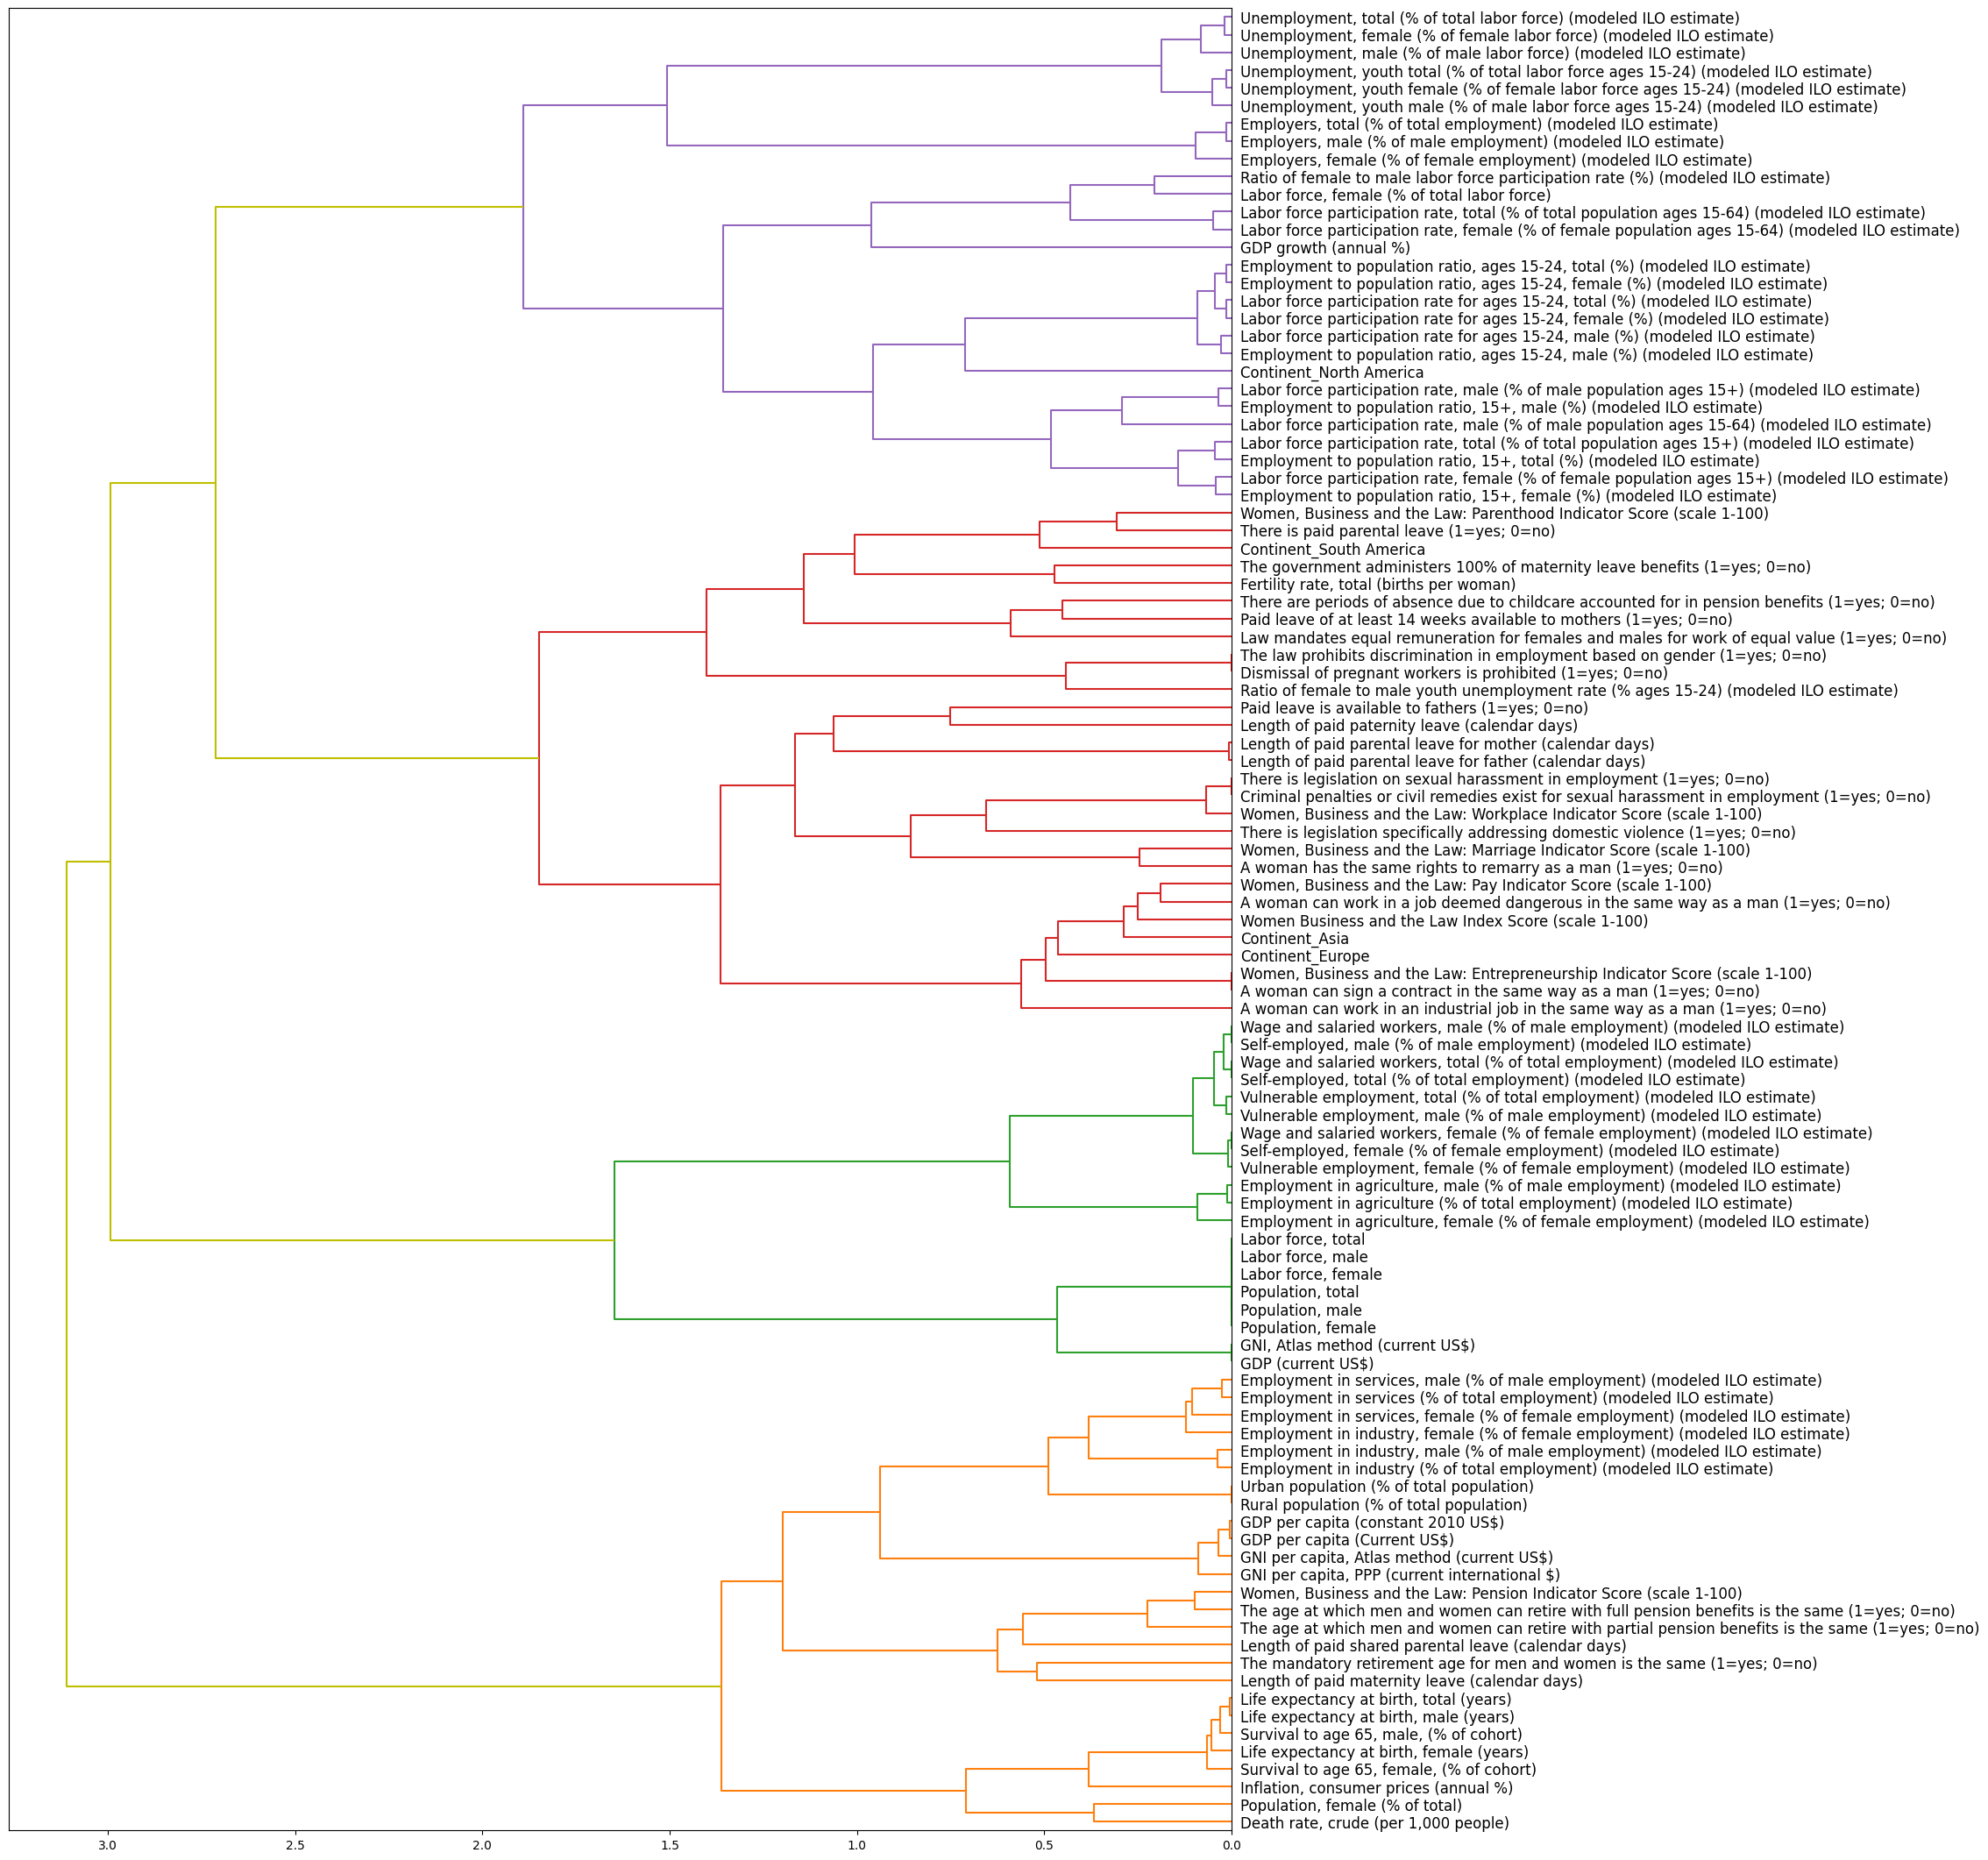

In [24]:
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dist_linkage = np.clip(dist_linkage, a_min=0, a_max=None)
dist_linkage = np.clip(dist_linkage, a_min=0, a_max=None)
#dendro = hierarchy.dendrogram(
#    dist_linkage, labels=distance_matrix.columns.to_list(), leaf_rotation=90, truncate_mode='level'
#)
fig = plt.subplots(1, 1, figsize=(18, 27))
dn1 = hierarchy.dendrogram(dist_linkage, labels=distance_matrix.columns.to_list(), above_threshold_color='y',
                           orientation='left', leaf_font_size=12, get_leaves=True)
plt.show()

Unemployment

In [15]:
unemployment_cols = [col for col in df.columns if 'Unemployment' in col]
unemployment_cols

['Unemployment, female (% of female labor force) (modeled ILO estimate)',
 'Unemployment, male (% of male labor force) (modeled ILO estimate)',
 'Unemployment, total (% of total labor force) (modeled ILO estimate)',
 'Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)',
 'Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)',
 'Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)']

## Variance inflation factor

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [6]:
def compute_vif(df):
    
    df['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [7]:
vif = compute_vif(df)

c:\github\Private\private\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\github\Private\private\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [95]:
[col for col in df_dropped.columns if 'The law' in  col]

['The law prohibits discrimination in employment based on gender (1=yes; 0=no)']

In [162]:
df_dropped = df.drop(['Labor force, female', 'Labor force, male', 'Labor force, total', 'Population, female', 'Population, male', 'Population, total', 
    'GNI per capita, Atlas method (current US$)', 
    'Employment to population ratio, 15+, total (%) (modeled ILO estimate)', 
    'Employment to population ratio, 15+, female (%) (modeled ILO estimate)',
    'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)',
    'Employment to population ratio, 15+, male (%) (modeled ILO estimate)',
    'Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)',
    'There is legislation on sexual harassment in employment (1=yes; 0=no)',
    'Labor force participation rate for ages 15-24, female (%) (modeled ILO estimate)',
    'Survival to age 65, female, (% of cohort)',
    'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)',
    'Labor force, female (% of total labor force)',
    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
    'GNI, Atlas method (current US$)',
    'Urban population (% of total population)',
    'GDP (current US$)', 
    'Dismissal of pregnant workers is prohibited (1=yes; 0=no)', 
    'A woman can sign a contract in the same way as a man (1=yes; 0=no)', 
    'Self-employed, total (% of total employment) (modeled ILO estimate)',
    'A woman can obtain a judgment of divorce in the same way as a man (1=yes; 0=no)',
    'Self-employed, female (% of female employment) (modeled ILO estimate)',
    'Self-employed, male (% of male employment) (modeled ILO estimate)',
    'GDP per capita (constant 2010 US$)',
    'Continent_South America',
    'Continent_North America',
    'Continent_Europe',
    'Continent_Asia',
    'Life expectancy at birth, male (years)',
    'Length of paid parental leave for mother (calendar days)',
    'Vulnerable employment, female (% of female employment) (modeled ILO estimate)',
    'Employment in agriculture, male (% of male employment) (modeled ILO estimate)'], axis=1)
vif_labor_froce = compute_vif(df_dropped)
vif_labor_froce.sort_values('VIF', ascending=False)
#vif_labor_froce[vif_labor_froce['Variable'].isin(drop_cols)]

c:\github\Private\private\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\github\Private\private\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Variable,VIF
0,A woman can work in a job deemed dangerous in the same way as a man (1=yes; 0=no),inf
43,The age at which men and women can retire with partial pension benefits is the same (1=yes; 0=no),inf
49,There is paid parental leave (1=yes; 0=no),inf
48,There is legislation specifically addressing domestic violence (1=yes; 0=no),inf
47,There are periods of absence due to childcare accounted for in pension benefits (1=yes; 0=no),inf
...,...,...
28,"Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)",inf
29,Law mandates equal remuneration for females and males for work of equal value (1=yes; 0=no),inf
30,Length of paid maternity leave (calendar days),inf
31,Length of paid parental leave for father (calendar days),inf


In [163]:
corr = df_dropped.corr()
corr = (corr + corr.T) / 2
np.fill_diagonal(corr.values, 1)
corr = corr.iloc[:-1, :-1]

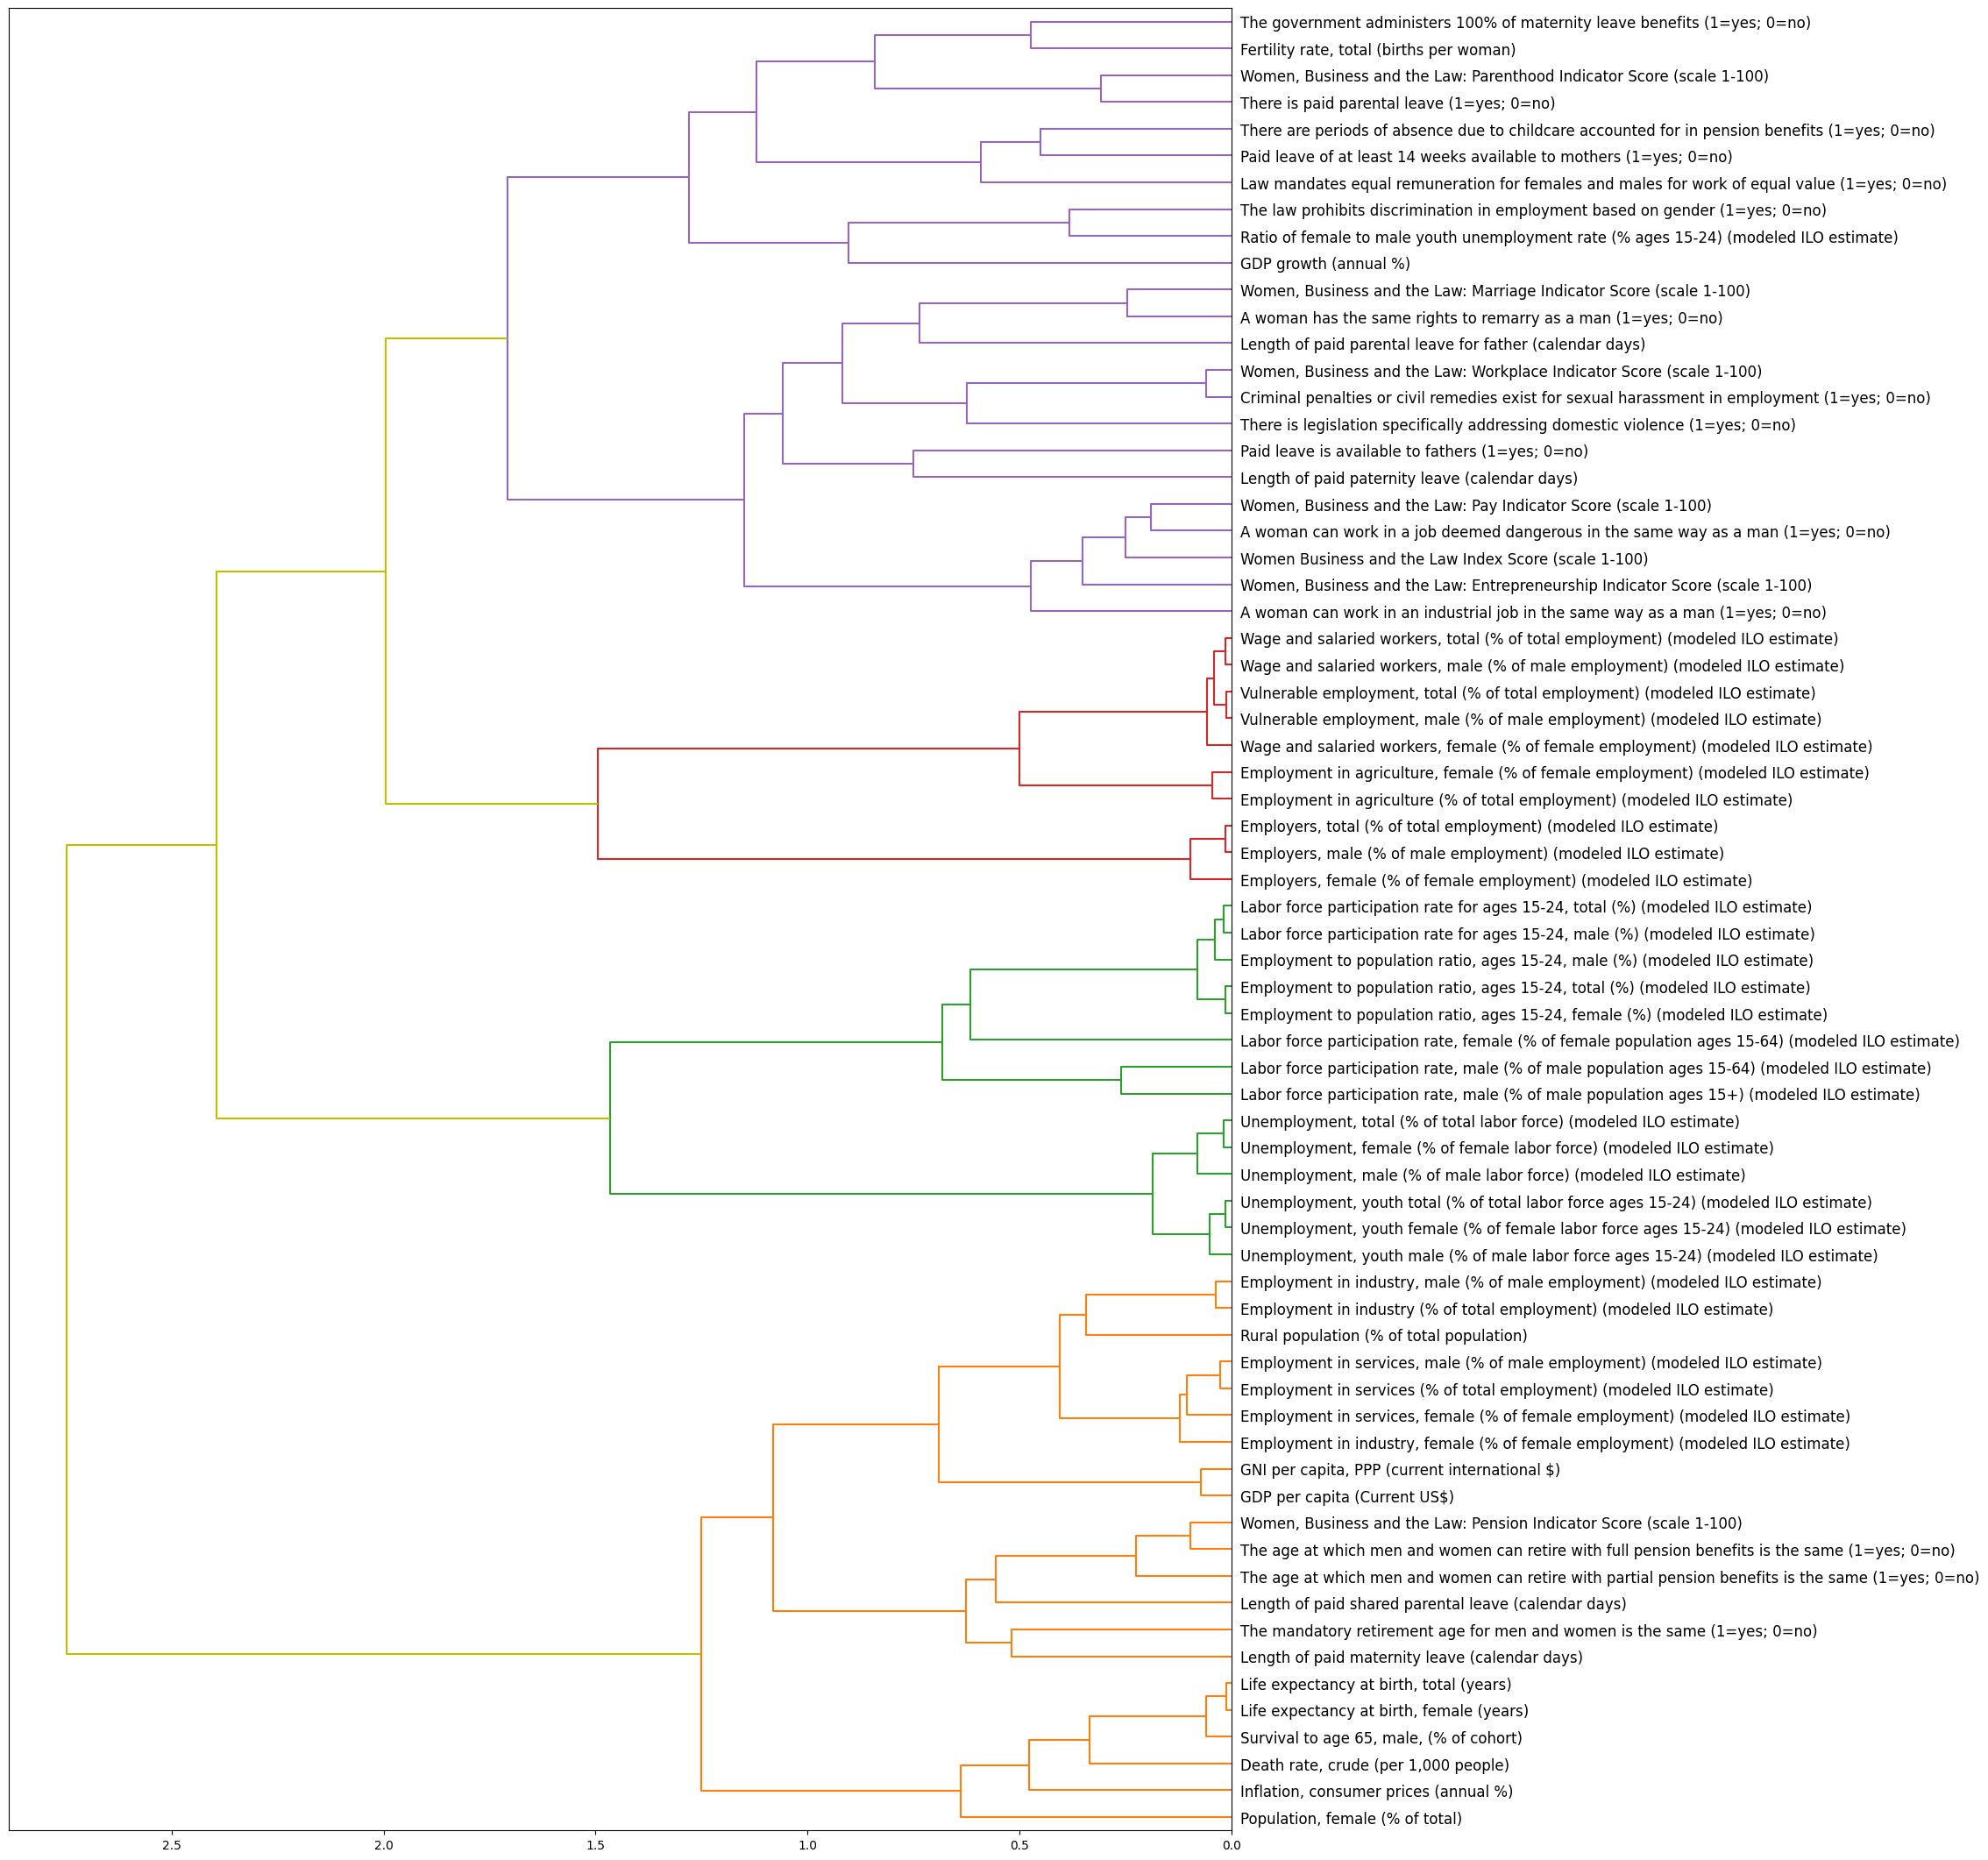

In [164]:
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dist_linkage = np.clip(dist_linkage, a_min=0, a_max=None)
dist_linkage = np.clip(dist_linkage, a_min=0, a_max=None)
fig = plt.subplots(1, 1, figsize=(18, 27))
dn1 = hierarchy.dendrogram(dist_linkage, labels=distance_matrix.columns.to_list(), above_threshold_color='y',
                           orientation='left', leaf_font_size=12, get_leaves=True)
plt.show()

In [97]:
import seaborn as sns

In [139]:
def get_top_correlations_blog(df, threshold=0.4):
    """
    df: the dataframe to get correlations from
    threshold: the maximum and minimum value to include for correlations. For eg, if this is 0.4, only pairs haveing a correlation coefficient greater than 0.4 or less than -0.4 will be included in the results. 
    """
    orig_corr = df.corr()
    c = orig_corr.abs()

    so = c.unstack()

    print("|    Variable 1    |    Variable 2    | Correlation Coefficient    |")
    print("|------------------|------------------|----------------------------|")
    
    i=0
    pairs=set()
    result = pd.DataFrame()
    for index, value in so.sort_values(ascending=False).items():
        # Exclude duplicates and self-correlations
        if value > threshold \
        and index[0] != index[1] \
        and (index[0], index[1]) not in pairs \
        and (index[1], index[0]) not in pairs:
            
            print(f'|    {index[0]}    |    {index[1]}    |    {orig_corr.loc[(index[0], index[1])]}    |')
            result.loc[i, ['Variable 1', 'Variable 2', 'Correlation Coefficient']] = [index[0], index[1], orig_corr.loc[(index[0], index[1])]]
            pairs.add((index[0], index[1]))
            i+=1
    return result.reset_index(drop=True).set_index(['Variable 1', 'Variable 2'])

C:\github\Private\Fertility_rates_project

In [165]:
get_top_correlations_blog(df_dropped)

|    Variable 1    |    Variable 2    | Correlation Coefficient    |
|------------------|------------------|----------------------------|
|    Life expectancy at birth, total (years)    |    Life expectancy at birth, female (years)    |    0.9869225206222688    |
|    Vulnerable employment, male (% of male employment) (modeled ILO estimate)    |    Vulnerable employment, total (% of total employment) (modeled ILO estimate)    |    0.9867394101710846    |
|    Wage and salaried workers, male (% of male employment) (modeled ILO estimate)    |    Wage and salaried workers, total (% of total employment) (modeled ILO estimate)    |    0.9858055356431308    |
|    Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)    |    Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)    |    0.9855832260586341    |
|    Employment to population ratio, ages 15-24, female (%) (modeled ILO estimate)    |    Employment to population ratio

C:\Users\Alicja Fras\AppData\Local\Temp\ipykernel_14092\2975991227.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Life expectancy at birth, total (years)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result.loc[i, ['Variable 1', 'Variable 2', 'Correlation Coefficient']] = [index[0], index[1], orig_corr.loc[(index[0], index[1])]]
C:\Users\Alicja Fras\AppData\Local\Temp\ipykernel_14092\2975991227.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Life expectancy at birth, female (years)' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  result.loc[i, ['Variable 1', 'Variable 2', 'Correlation Coefficient']] = [index[0], index[1], orig_corr.loc[(index[0], index[1])]]


|    Employment in agriculture (% of total employment) (modeled ILO estimate)    |    Employment in services, male (% of male employment) (modeled ILO estimate)    |    -0.6351150448325439    |
|    Employment in industry, female (% of female employment) (modeled ILO estimate)    |    GDP per capita (Current US$)    |    -0.6334772066083312    |
|    Death rate, crude (per 1,000 people)    |    Population, female (% of total)    |    0.6322685662986894    |
|    Life expectancy at birth, total (years)    |    GNI per capita, PPP (current international $)    |    0.6295965917923744    |
|    Employment in services (% of total employment) (modeled ILO estimate)    |    Women, Business and the Law: Pension Indicator Score (scale 1-100)    |    0.6281856884591962    |
|    The age at which men and women can retire with full pension benefits is the same (1=yes; 0=no)    |    Employment in services, female (% of female employment) (modeled ILO estimate)    |    0.6249980396294884    |
|    W

,,Correlation Coefficient
Variable 1,Variable 2,
"Life expectancy at birth, total (years)","Life expectancy at birth, female (years)",0.98692
"Vulnerable employment, male (% of male employment) (modeled ILO estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)",0.98674
"Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",0.98581
"Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)","Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate)",0.98558
"Employment to population ratio, ages 15-24, female (%) (modeled ILO estimate)","Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)",0.98545
...,...,...
"Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)","Unemployment, female (% of female labor force) (modeled ILO estimate)",-0.40345
Employment in agriculture (% of total employment) (modeled ILO estimate),"Women, Business and the Law: Pension Indicator Score (scale 1-100)",-0.40338
"Unemployment, total (% of total labor force) (modeled ILO estimate)","Employment to population ratio, ages 15-24, total (%) (modeled ILO estimate)",-0.40293
